In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
from util import RESOURCE_DIR
from util import RESOURCE_DIR, IMAGES_DIR
from matplotlib_venn import venn2

type_characterization = ['query.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.head()

,owner,name,domain,sha1,part_commit,date_commit,isLast,Builder,jooq,checkafter,"(IgnoreCase, SQL)",spring,jdbc,mybatis
0,Activiti,Activiti,Enterprise Resource Planning,18facf90f45c567b3c9040bd83cca7e1c586387f,NaN,2024-10-11 20:12:54+00:00,True,1,0,0,1,1,0,0
1,airbnb,lottie-android,Game,e320c993c4ee501b488dadb0a6bfe64f91ce7404,NaN,2024-10-04 18:54:43+00:00,True,0,0,0,1,0,0,0
2,alibaba,spring-cloud-alibaba,Software Development,fadd6ba4228063ba8a2b25509d85d27d78359b5a,NaN,2024-09-27 12:04:25+00:00,True,1,0,0,1,1,0,0
3,alibaba,nacos,Infrastructure Management,b97116458c756ab35c1aa5e7e45ae77c8ecca356,NaN,2024-10-15 02:13:03+00:00,True,1,0,0,1,1,0,0
4,alibaba,fastjson,Data Management,c942c83443117b73af5ad278cc780270998ba3e1,NaN,2023-05-12 06:16:03+00:00,True,1,0,1,1,0,0,0


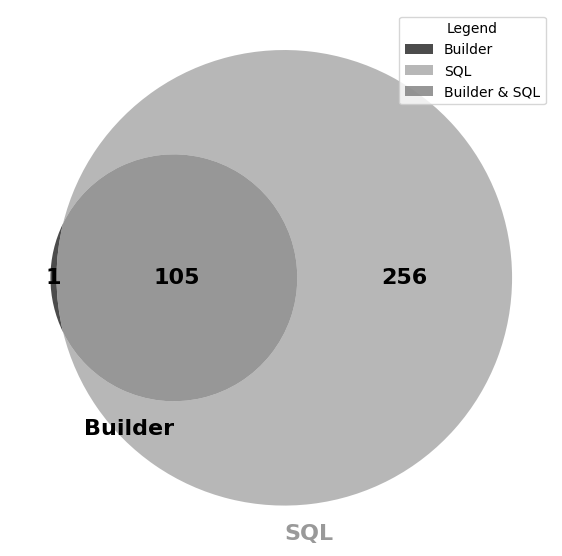

In [3]:
from collections import Counter
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)

AB_overlap = 0
A_rest = 0
B_rest = 0

for i in range(len(df)):
    if (df.at[i,'Builder'] == df.at[i, 'SQL']):
        AB_overlap += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'SQL'] == 1):
        B_rest += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'Builder'] == 1):
        A_rest += 1

sets = Counter()
sets['10'] = A_rest
sets['01'] = B_rest
sets['11'] = AB_overlap

labels = ('Builder', 'SQL')
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['#000000','#999999']
v = venn2(subsets=sets, set_labels=labels, ax=ax,set_colors= colors, alpha=0.7)

i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  text.set_fontsize(16)
  text.set_fontweight('bold')
  i+=1
  
for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')
  
h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['Builder','SQL','Builder & SQL']
ax.legend(handles=h, labels=l, title="Legend",loc='upper right')  

plt.savefig(IMAGES_DIR+"/fig8.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [4]:
#calcula a quantidade de bancos utilizados e a quantidade de projetos que encontramos bancos
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df['BDsPerProjects'] = df.sum(axis=1, numeric_only=True)
#df = df.iloc[2:].sort_values(ascending=False)
#df.count(by='BDsPerProjects')
df

,owner,name,domain,sha1,part_commit,date_commit,isLast,Builder,jooq,checkafter,"(IgnoreCase, SQL)",spring,jdbc,mybatis,BDsPerProjects
0,Activiti,Activiti,Enterprise Resource Planning,18facf90f45c567b3c9040bd83cca7e1c586387f,NaN,2024-10-11 20:12:54+00:00,True,1,0,0,1,1,0,0,4
1,airbnb,lottie-android,Game,e320c993c4ee501b488dadb0a6bfe64f91ce7404,NaN,2024-10-04 18:54:43+00:00,True,0,0,0,1,0,0,0,2
2,alibaba,spring-cloud-alibaba,Software Development,fadd6ba4228063ba8a2b25509d85d27d78359b5a,NaN,2024-09-27 12:04:25+00:00,True,1,0,0,1,1,0,0,4
3,alibaba,nacos,Infrastructure Management,b97116458c756ab35c1aa5e7e45ae77c8ecca356,NaN,2024-10-15 02:13:03+00:00,True,1,0,0,1,1,0,0,4
4,alibaba,fastjson,Data Management,c942c83443117b73af5ad278cc780270998ba3e1,NaN,2023-05-12 06:16:03+00:00,True,1,0,1,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,yacy,yacy_search_server,Infrastructure Management,a8c64b1af2c7842063a352c5c9f237b82c0796a5,NaN,2024-09-21 19:56:12+00:00,True,0,0,0,1,0,0,0,2
358,zaproxy,zaproxy,Security,7da62c3f09cac65f99c75624b5937893c25c4a03,NaN,2024-10-14 08:12:11+00:00,True,0,0,0,1,0,0,0,2
359,zendesk,maxwell,Data Management,d49890270be3ca2cc0af176f8406da61ecc2db13,NaN,2024-09-25 20:18:45+00:00,True,0,0,0,1,0,0,0,2
360,zxing,zxing,Software Development,9598db91c753293e61d13f6405a4b9e8dfcf6843,NaN,2024-10-11 19:10:45+00:00,True,0,0,0,1,0,0,0,2
